# Empirical

## Stellar inlicnation from empirical relation
Let's use the relation in [Louden et al. (2021)](https://ui.adsabs.harvard.edu/abs/2021AJ....161...68L/abstract) to calculate the stellar rotation speed at the equator, $v$, and subsequently the stellar inclination, $i_\star$, using the projected stellar rotation speed, $v \sin i_\star$, and effective temperature, $T_{\rm eff}$. 

We'll assume we have measured $T_{\rm eff}=6450 \pm 100$ K and $v \sin i_\star=6.1 \pm 0.5$ km/s. 

In [ ]:
import coPsi
## Instantiate iStar with values for Teff and vsini
incs = coPsi.iStar(Teff=(6450,100,0,7000,'gauss'),vsini=(6.1,0.5,0,20,'gauss'))

Before we do anything, let's see how these values compare to the relation:

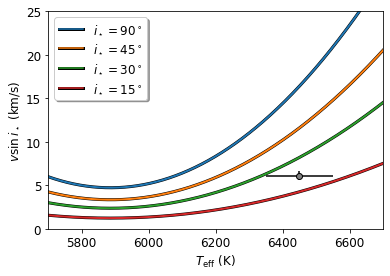

In [ ]:
## Compare to relation from Louden
incs.plotLouden(Teff=6450,vsini=6.1,sTeff=100,svsini=0.5)

Given those values, we'll create some (normal/gaussian) distributions for these variables and then calculate $i_\star$.

In [ ]:
## Create distributions for Teff and vsini
incs.createDistributions()
## Calculate the stellar incliation using the Louden et al. (2021) relation
incs.stellarInclinationLouden()

Let's look at the results

Median and confidence level (0.68 credibility):
incs=20.685+4.974-7.556


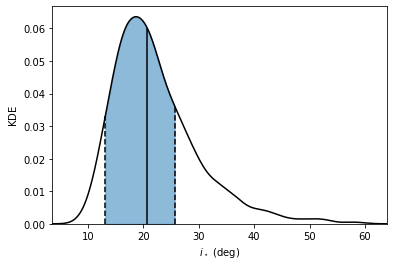

In [ ]:
## Calculate median and credible interval and plot the resulting KDE
incs.diagnostics('incs')

If we have measures for the obliquity, $\lambda$, and the orbital inclination, $i_{\rm o}$, we can calculate the obliquity, $\psi$. Here we'll create distributions externally (which could have come from an MCMC), but they could also be created like before.

Median and confidence level (0.68 credibility):
psi=101.952+4.777-7.377


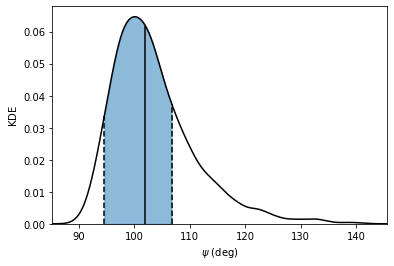

In [ ]:
import numpy as np
## Let's say we also have distributions for lambda and the orbital inlination 
## of a length similar to the distributionk for the stellar inclination
## (here we'll simulate them)
incs.dist['lam'] = np.random.normal(-192,5,len(incs.dist['incs']))
incs.dist['inco'] = np.random.normal(81.81,0.12,len(incs.dist['incs']))

## Now let's calculate the obliquity psi
incs.coPsi()
incs.diagnostics('psi')